In [ ]:
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
import numpy as np
import os
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from glob import glob

Epoch 1/30, Loss: 0.7422
Epoch 2/30, Loss: 0.5274
Epoch 3/30, Loss: 0.4218
Epoch 4/30, Loss: 0.3525
Epoch 5/30, Loss: 0.3027
Epoch 6/30, Loss: 0.2709
Epoch 7/30, Loss: 0.2505
Epoch 8/30, Loss: 0.2328
Epoch 9/30, Loss: 0.2205
Epoch 10/30, Loss: 0.2106
Epoch 11/30, Loss: 0.2061
Epoch 12/30, Loss: 0.1999
Epoch 13/30, Loss: 0.1943
Epoch 14/30, Loss: 0.1845
Epoch 15/30, Loss: 0.1804
Epoch 16/30, Loss: 0.1713
Epoch 17/30, Loss: 0.1648
Epoch 18/30, Loss: 0.1610
Epoch 19/30, Loss: 0.1629
Epoch 20/30, Loss: 0.1641
Epoch 21/30, Loss: 0.1585
Epoch 22/30, Loss: 0.1582
Epoch 23/30, Loss: 0.1507
Epoch 24/30, Loss: 0.1445
Epoch 25/30, Loss: 0.1422
Epoch 26/30, Loss: 0.1395
Epoch 27/30, Loss: 0.1478
Epoch 28/30, Loss: 0.1468
Epoch 29/30, Loss: 0.1398
Epoch 30/30, Loss: 0.1316


In [ ]:
INPUT_DIM = 126
OUTPUT_DIM = 36
HIDDEN_DIM = 256
NUM_LAYERS = 2
SEQ_LEN = 500
BATCH_SIZE = 8
EPOCHS = 30
DATA_FOLDER = "Subject_Data/S5/sync_data/filtered"

In [ ]:
joint_angle_columns = [
    "pelvis_tilt", "pelvis_list", "pelvis_rotation",
    "hip_flexion_r", "hip_adduction_r", "hip_rotation_r", "knee_angle_r", "knee_angle_r_beta",
    "ankle_angle_r", "subtalar_angle_r", "mtp_angle_r",
    "hip_flexion_l", "hip_adduction_l", "hip_rotation_l", "knee_angle_l", "knee_angle_l_beta",
    "ankle_angle_l", "subtalar_angle_l", "mtp_angle_l",
    "lumbar_extension", "lumbar_bending", "lumbar_rotation",
    "arm_flex_r", "arm_add_r", "arm_rot_r", "elbow_flex_r", "pro_sup_r", "wrist_flex_r", "wrist_dev_r",
    "arm_flex_l", "arm_add_l", "arm_rot_l", "elbow_flex_l", "pro_sup_l", "wrist_flex_l", "wrist_dev_l"
]


# XYZ Columns (verified 42 joints × 3 = 126)

xyz_cols = [
    'L.FootHeel_X', 'L.FootHeel_Y', 'L.FootHeel_Z',
    'L.AnkleLateral_X', 'L.AnkleLateral_Y', 'L.AnkleLateral_Z',
    'L.AnkleMedial_X', 'L.AnkleMedial_Y', 'L.AnkleMedial_Z',
    'L.ToeLateral_X', 'L.ToeLateral_Y', 'L.ToeLateral_Z',
    'L.ToeMedial_X', 'L.ToeMedial_Y', 'L.ToeMedial_Z',
    'L.WristMedial_X', 'L.WristMedial_Y', 'L.WristMedial_Z',
    'L.WristLateral_X', 'L.WristLateral_Y', 'L.WristLateral_Z',
    'L.ShoulderFront_X', 'L.ShoulderFront_Y', 'L.ShoulderFront_Z',
    'L.ShoulderRear_X', 'L.ShoulderRear_Y', 'L.ShoulderRear_Z',
    'L.KneeLateral_X', 'L.KneeLateral_Y', 'L.KneeLateral_Z',
    'L.KneeMedial_X', 'L.KneeMedial_Y', 'L.KneeMedial_Z',
    'L.LowerArmLateral_X', 'L.LowerArmLateral_Y', 'L.LowerArmLateral_Z',
    'L.LowerArmMedial_X', 'L.LowerArmMedial_Y', 'L.LowerArmMedial_Z',
    'R.AnkleLateral_X', 'R.AnkleLateral_Y', 'R.AnkleLateral_Z',
    'R.AnkleMedial_X', 'R.AnkleMedial_Y', 'R.AnkleMedial_Z',
    'R.ToeLateral_X', 'R.ToeLateral_Y', 'R.ToeLateral_Z',
    'R.ToeMedial_X', 'R.ToeMedial_Y', 'R.ToeMedial_Z',
    'R.WristMedial_X', 'R.WristMedial_Y', 'R.WristMedial_Z',
    'R.WristLateral_X', 'R.WristLateral_Y', 'R.WristLateral_Z',
    'R.ShoulderFront_X', 'R.ShoulderFront_Y', 'R.ShoulderFront_Z',
    'R.ShoulderRear_X', 'R.ShoulderRear_Y', 'R.ShoulderRear_Z',
    'R.KneeLateral_X', 'R.KneeLateral_Y', 'R.KneeLateral_Z',
    'R.KneeMedial_X', 'R.KneeMedial_Y', 'R.KneeMedial_Z',
    'R.LowerArmLateral_X', 'R.LowerArmLateral_Y', 'R.LowerArmLateral_Z',
    'R.LowerArmMedial_X', 'R.LowerArmMedial_Y', 'R.LowerArmMedial_Z',
    'LASIS_X', 'LASIS_Y', 'LASIS_Z', 'LPSIS_X', 'LPSIS_Y', 'LPSIS_Z',
    'RASIS_X', 'RASIS_Y', 'RASIS_Z', 'RPSIS_X', 'RPSIS_Y', 'RPSIS_Z',
    'C7_X', 'C7_Y', 'C7_Z', 'CLAV_X', 'CLAV_Y', 'CLAV_Z',
    'LACR_X', 'LACR_Y', 'LACR_Z', 'RACR_X', 'RACR_Y', 'RACR_Z',
    'Head_Top_X', 'Head_Top_Y', 'Head_Top_Z',
    'R.UpparArm_X', 'R.UpparArm_Y', 'R.UpparArm_Z',
    'L.UpparArm_X', 'L.UpparArm_Y', 'L.UpparArm_Z',
    'R.Thigh_X', 'R.Thigh_Y', 'R.Thigh_Z',
    'L.Thigh_X', 'L.Thigh_Y', 'L.Thigh_Z',
    'R.Shank_X', 'R.Shank_Y', 'R.Shank_Z',
    'L.Shank_X', 'L.Shank_Y', 'L.Shank_Z',
    'RFAsuperior_X', 'RFAsuperior_Y', 'RFAsuperior_Z',
    'LFAsuperior_X', 'LFAsuperior_Y', 'LFAsuperior_Z'
]


In [ ]:


def load_data(folder):
    xyz_list, angle_list = [], []
    for file in sorted(glob(os.path.join(folder, "*.csv"))):
        df = pd.read_csv(file)
        if not all(col in df.columns for col in xyz_cols + joint_angle_columns):
            print(f"Skipping {file}: missing columns")
            continue
        xyz_vals = df[xyz_cols].values
        if xyz_vals.shape[1] != 126:
            print(f"Skipping {file}: expected 126 xyz cols, got {xyz_vals.shape[1]}")
            continue
        angles = df[joint_angle_columns].values
        if xyz_vals.shape[0] != angles.shape[0]:
            print(f"Skipping {file}: mismatch in time steps — xyz({xyz_vals.shape[0]}) vs angles({angles.shape[0]})")
            continue
        xyz_list.append(xyz_vals.reshape(-1, 42, 3))
        angle_list.append(angles)
    return xyz_list, angle_list

class MoCapAngleDataset(Dataset):
    def __init__(self, xyz_list, angle_list):
        self.X = []
        self.y = []

        self.xyz_scaler = StandardScaler()
        self.ang_scaler = StandardScaler()

        # Filter out angle arrays that don't have shape (T, 39)
        filtered_xyz, filtered_ang = [], []
        for x, a in zip(xyz_list, angle_list):
            if a.shape[1] != OUTPUT_DIM:
                print(f"⚠️ Skipping sequence with incorrect angle shape: {a.shape}")
                continue
            filtered_xyz.append(x)
            filtered_ang.append(a)

        # Fit scalers
        flat_xyz = np.concatenate([seq.reshape(-1, INPUT_DIM) for seq in filtered_xyz], axis=0)
        flat_ang = np.concatenate([seq for seq in filtered_ang], axis=0)

        self.xyz_scaler.fit(flat_xyz)
        self.ang_scaler.fit(flat_ang)

        for i in range(len(filtered_xyz)):
            norm_xyz = self.xyz_scaler.transform(filtered_xyz[i].reshape(-1, INPUT_DIM)).reshape(-1, 42, 3)
            norm_ang = self.ang_scaler.transform(filtered_ang[i])

            for j in range(0, norm_xyz.shape[0] - SEQ_LEN, SEQ_LEN):
                self.X.append(norm_xyz[j:j+SEQ_LEN].reshape(SEQ_LEN, -1))
                self.y.append(norm_ang[j:j+SEQ_LEN])

        self.X = torch.tensor(np.stack(self.X), dtype=torch.float32)
        self.y = torch.tensor(np.stack(self.y), dtype=torch.float32)

    def __len__(self):
        return len(self.X)

    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


# LSTM Model

class LSTMModel(nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers=2):
        super().__init__()
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True, dropout=0.3)
        self.fc = nn.Linear(hidden_dim, output_dim)

    def forward(self, x):
        out, _ = self.lstm(x)
        return self.fc(out)


# Training Loop


In [ ]:

xyz_list, angle_list = load_data(DATA_FOLDER)
dataset = MoCapAngleDataset(xyz_list, angle_list)
loader = DataLoader(dataset, batch_size=BATCH_SIZE, shuffle=True)


model = LSTMModel(INPUT_DIM, HIDDEN_DIM, OUTPUT_DIM, NUM_LAYERS)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
criterion = nn.MSELoss()

for epoch in range(EPOCHS):
    model.train()
    total_loss = 0
    for xb, yb in loader:
        optimizer.zero_grad()
        loss = criterion(model(xb), yb)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1}/{EPOCHS}, Loss: {total_loss/len(loader):.4f}")


In [ ]:
torch.save(model.state_dict(), "lstm_joint_angle_model.pth")
print("✅ Model saved as lstm_joint_angle_model.pth")

✅ Model saved as lstm_joint_angle_model.pth


In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

def plot_joint_angle_predictions(model, dataset, angle_scaler, channels=[0, 5, 10]):
    model.eval()
    
    # Picking the first 500 timesteps to plot
    X_sample, y_sample = dataset[0]
    X_sample = X_sample.unsqueeze(0)  # Add batch dim

    with torch.no_grad():
        y_pred = model(X_sample).squeeze(0).numpy()  # (SEQ_LEN, OUTPUT_DIM)

    y_true = y_sample.numpy()

    # Denormalize
    y_pred_denorm = angle_scaler.inverse_transform(y_pred)
    y_true_denorm = angle_scaler.inverse_transform(y_true)

    # Evaluate
    mse = mean_squared_error(y_true_denorm, y_pred_denorm)
    mae = mean_absolute_error(y_true_denorm, y_pred_denorm)
    r2 = r2_score(y_true_denorm, y_pred_denorm)
    print(f"\n📊 Evaluation Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")

    # Plot
    time = np.arange(y_true.shape[0])
    plt.figure(figsize=(20, 20))

    for i, idx in enumerate(channels):
        plt.subplot(len(channels), 1, i + 1)
        plt.plot(time, y_true_denorm[:, idx], label='Ground Truth', linewidth=2)
        plt.plot(time, y_pred_denorm[:, idx], '--', label='Predicted', linewidth=2)
        plt.title(f"Joint Angle {idx} — {joint_angle_columns[idx]}")
        plt.xlabel("Time Step")
        plt.ylabel("Angle (degrees)")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()



📊 Evaluation Metrics:
  MSE: 17.3267
  MAE: 2.5434
  R² Score: 0.2746


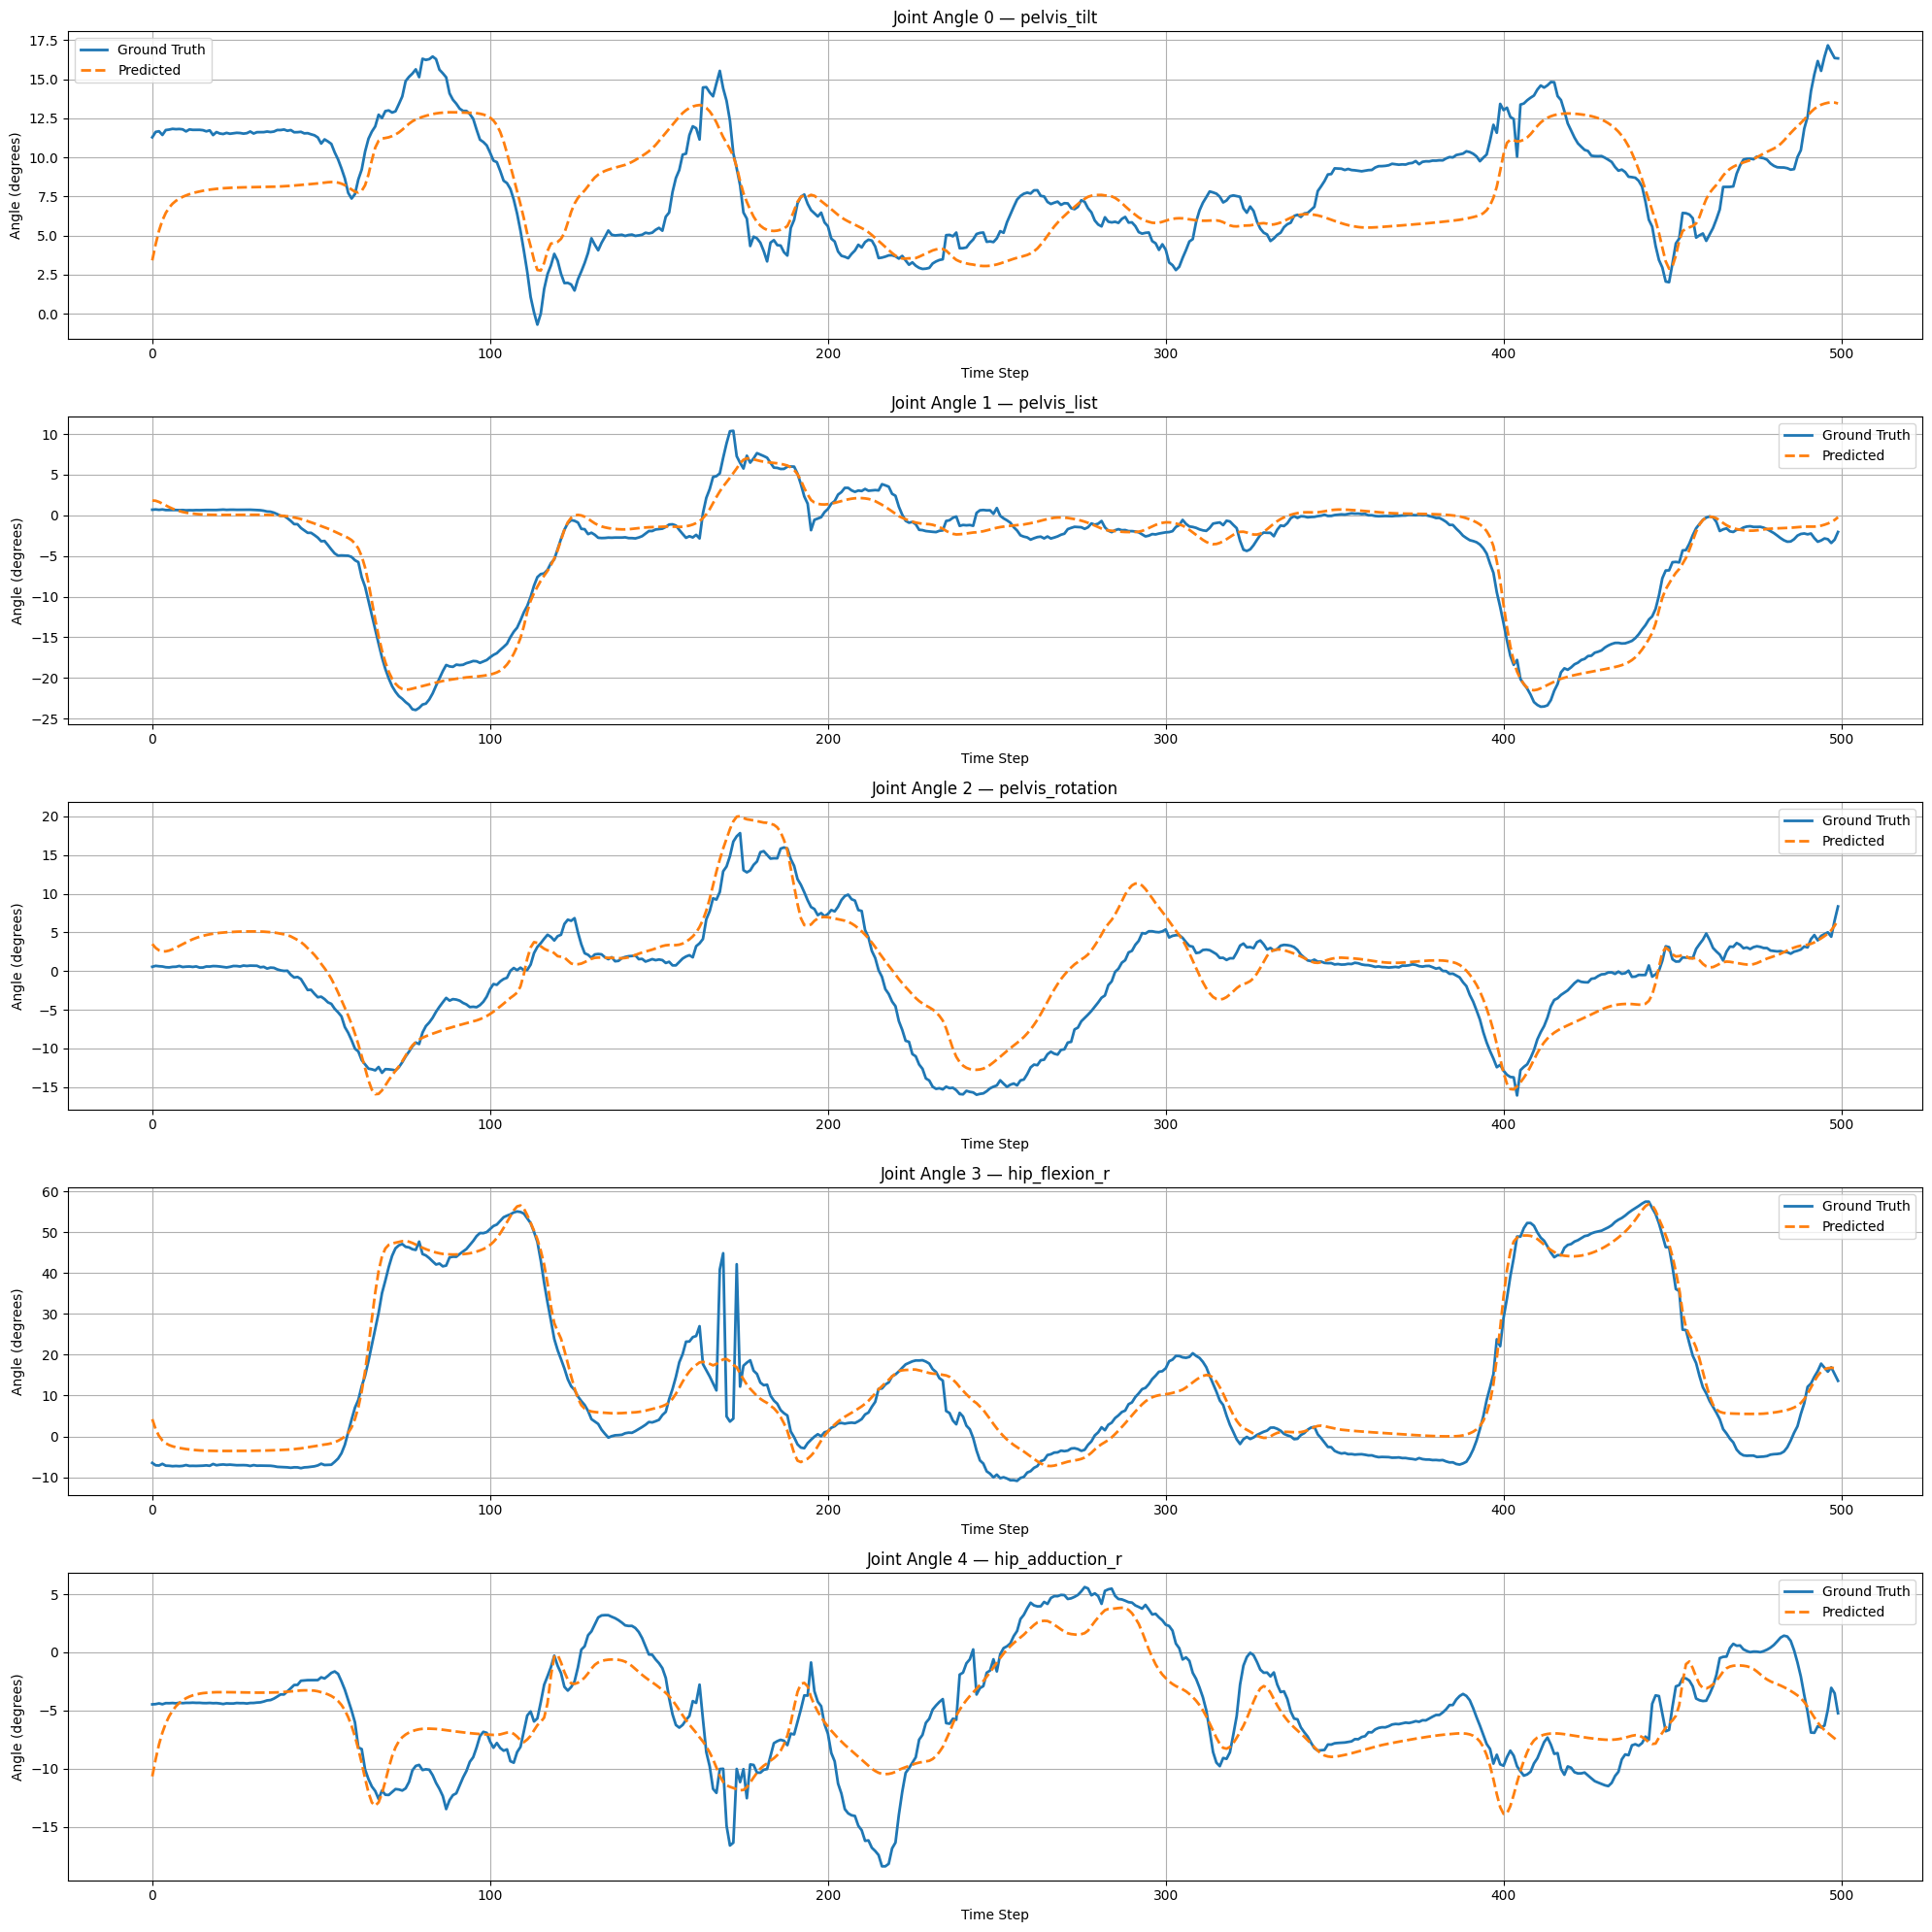

In [ ]:
plot_joint_angle_predictions(model, dataset, dataset.ang_scaler, channels=[0,1,2,3,4])

Testing on unseen data

In [11]:
joint_angle_columns = [
    "pelvis_tilt", "pelvis_list", "pelvis_rotation",
    "hip_flexion_r", "hip_adduction_r", "hip_rotation_r", "knee_angle_r", "knee_angle_r_beta",
    "ankle_angle_r", "subtalar_angle_r", "mtp_angle_r",
    "hip_flexion_l", "hip_adduction_l", "hip_rotation_l", "knee_angle_l", "knee_angle_l_beta",
    "ankle_angle_l", "subtalar_angle_l", "mtp_angle_l",
    "lumbar_extension", "lumbar_bending", "lumbar_rotation",
    "arm_flex_r", "arm_add_r", "arm_rot_r", "elbow_flex_r", "pro_sup_r", "wrist_flex_r", "wrist_dev_r",
    "arm_flex_l", "arm_add_l", "arm_rot_l", "elbow_flex_l", "pro_sup_l", "wrist_flex_l", "wrist_dev_l"
]

In [10]:
def load_unseen_dataset(folder_path, joint_angle_columns, xyz_cols, xyz_scaler, ang_scaler, seq_len=500):
    X_all, y_all = [], []

    for file in sorted(glob(os.path.join(folder_path, "*.csv"))):
        df = pd.read_csv(file)

        if not all(col in df.columns for col in xyz_cols + joint_angle_columns):
            print(f"Skipping {file}: missing required columns.")
            continue

        xyz = df[xyz_cols].values.reshape(-1, 126)
        angles = df[joint_angle_columns].values

        if xyz.shape[0] != angles.shape[0]:
            print(f"Skipping {file}: time length mismatch (xyz={xyz.shape[0]}, angles={angles.shape[0]})")
            continue

        norm_xyz = xyz_scaler.transform(xyz).reshape(-1, 42, 3)
        norm_angles = ang_scaler.transform(angles)

        for i in range(0, len(norm_xyz) - seq_len, seq_len):
            X_all.append(norm_xyz[i:i+seq_len].reshape(seq_len, -1))
            y_all.append(norm_angles[i:i+seq_len])

    X_tensor = torch.tensor(np.stack(X_all), dtype=torch.float32)
    y_tensor = torch.tensor(np.stack(y_all), dtype=torch.float32)

    return X_tensor, y_tensor

In [8]:
def plot_joint_angle_predictions_on_unseen(model, X_tensor, y_tensor, angle_scaler, joint_angle_columns, channels=[0, 1, 2]):
    model.eval()

    with torch.no_grad():
        y_pred = model(X_tensor).numpy()  # (num_windows, 500, 36)

    y_true = y_tensor.numpy()

    y_pred_denorm = angle_scaler.inverse_transform(y_pred.reshape(-1, y_pred.shape[-1]))
    y_true_denorm = angle_scaler.inverse_transform(y_true.reshape(-1, y_true.shape[-1]))

    time = np.arange(y_true_denorm.shape[0])
    plt.figure(figsize=(20, 20))

    for i, idx in enumerate(channels):
        plt.subplot(len(channels), 1, i + 1)
        plt.plot(time, y_true_denorm[:, idx], label='Ground Truth', linewidth=2)
        plt.plot(time, y_pred_denorm[:, idx], '--', label='Predicted', linewidth=2)
        plt.title(f"Unseen Data – Joint Angle {idx} — {joint_angle_columns[idx]}")
        plt.xlabel("Time Step")
        plt.ylabel("Angle (degrees)")
        plt.legend()
        plt.grid(True)

    plt.tight_layout()
    plt.show()

    # Optional: print overall evaluation metrics
    mse = mean_squared_error(y_true_denorm, y_pred_denorm)
    mae = mean_absolute_error(y_true_denorm, y_pred_denorm)
    r2 = r2_score(y_true_denorm, y_pred_denorm)
    print(f"\n📊 Unseen Evaluation Metrics:")
    print(f"  MSE: {mse:.4f}")
    print(f"  MAE: {mae:.4f}")
    print(f"  R² Score: {r2:.4f}")


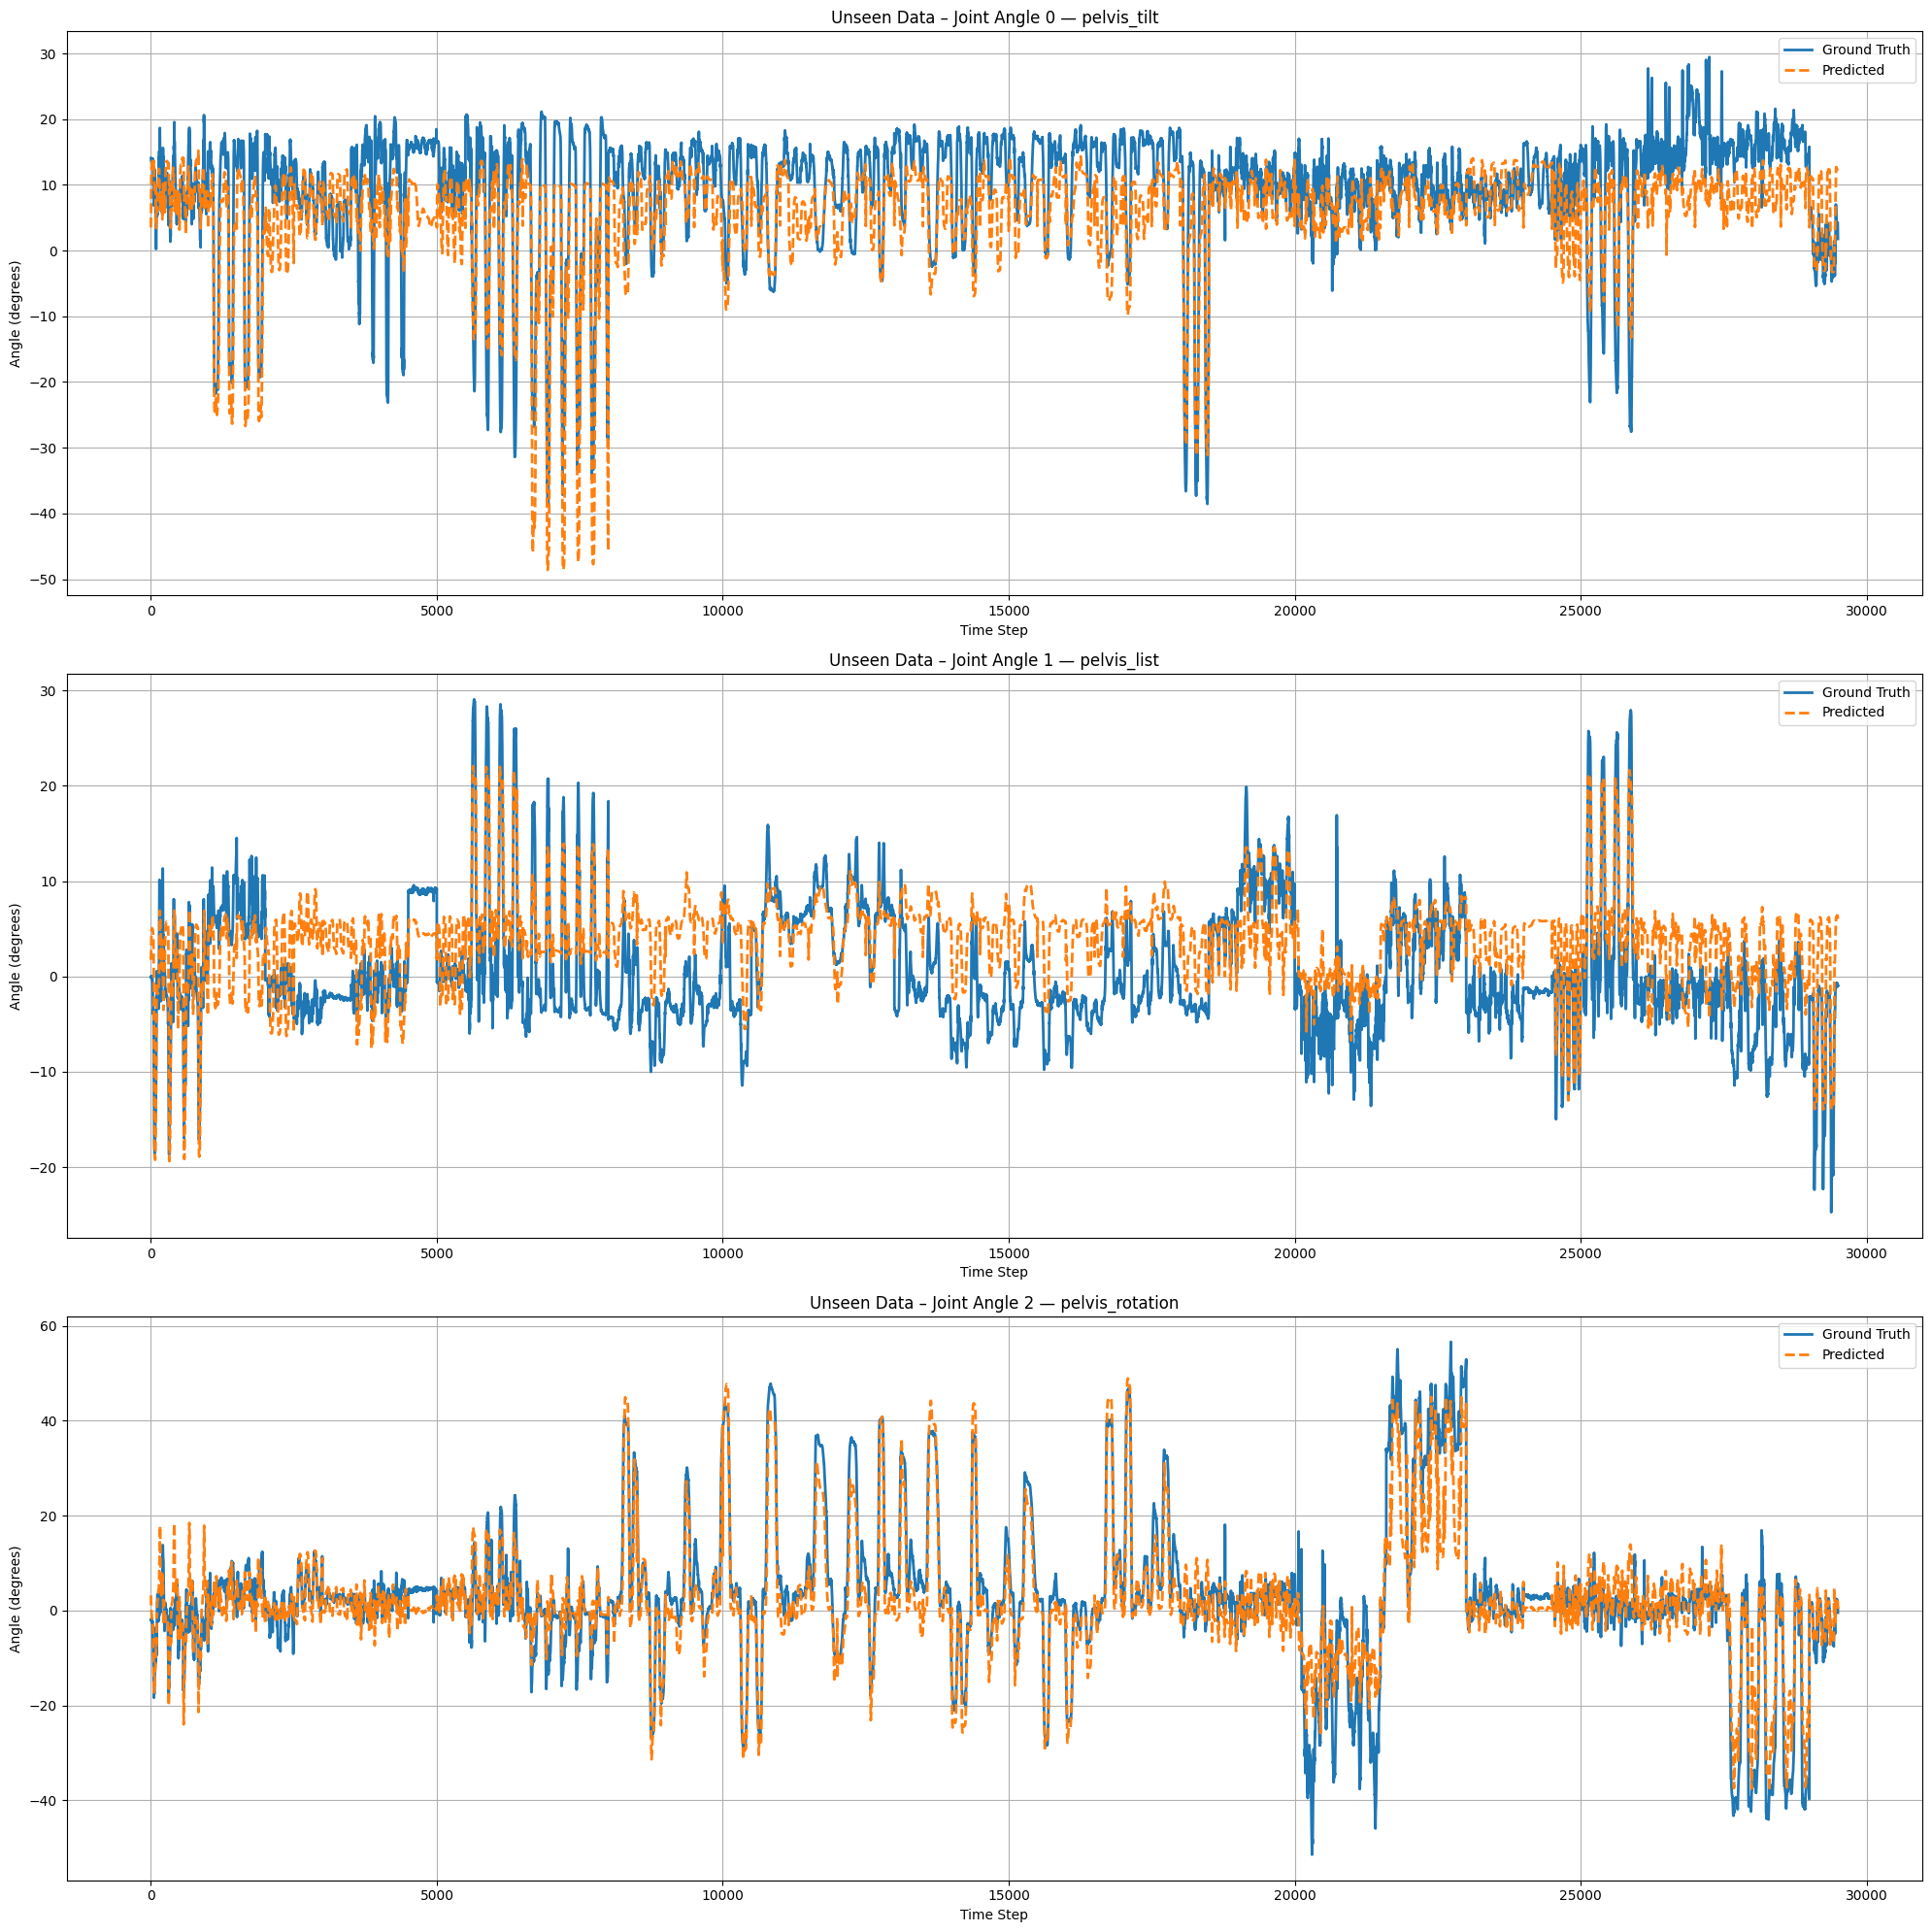


📊 Unseen Evaluation Metrics:
  MSE: 171.8249
  MAE: 7.1668
  R² Score: 0.1074


In [12]:
# Path to your unseen folder
UNSEEN_FOLDER = "Subject_Data/S4/sync_data/imputed"

# Load & window the unseen data
X_unseen, y_unseen = load_unseen_dataset(
    UNSEEN_FOLDER,
    joint_angle_columns,
    xyz_cols,
    dataset.xyz_scaler,
    dataset.ang_scaler
)

# Plot predictions vs ground truth
plot_joint_angle_predictions_on_unseen(
    model,
    X_unseen,
    y_unseen,
    dataset.ang_scaler,
    joint_angle_columns,
    channels=[0, 1, 2]
)


Predicting on video acquired joint coordinates

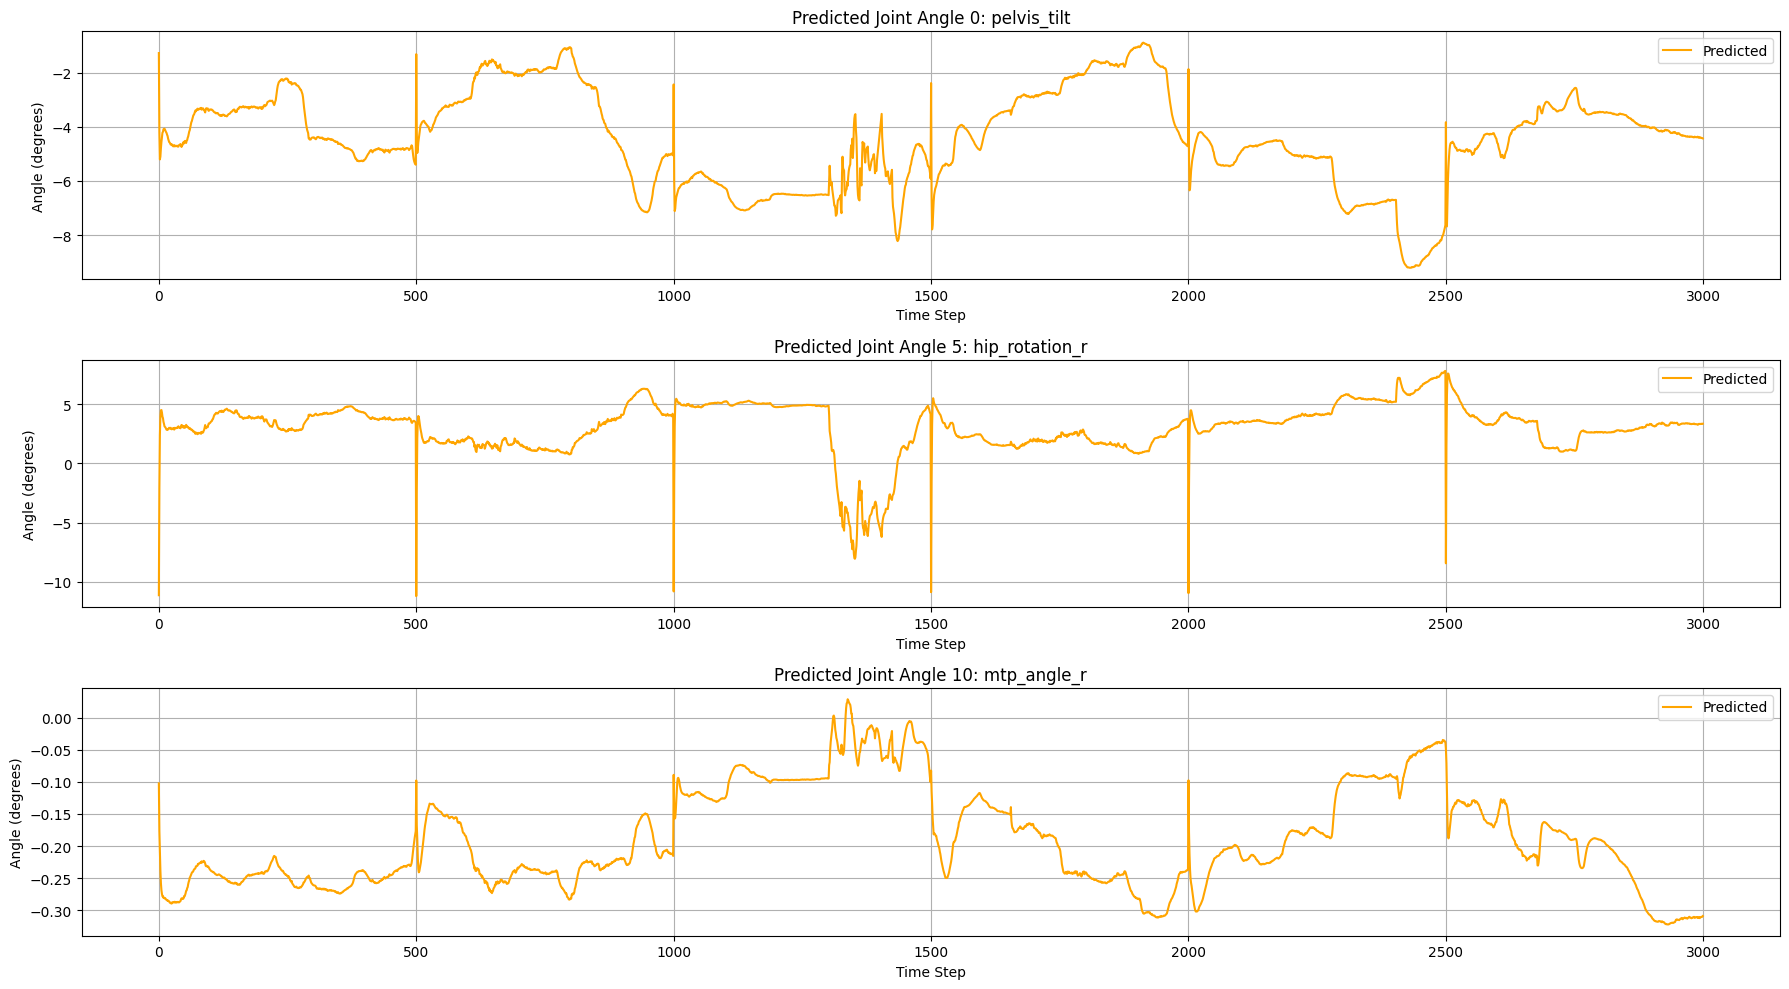

In [6]:
# Full pipeline to predict joint angles from smartphone-acquired 3D joint coordinates

import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# =========================
# 1. Expansion Function
# =========================
def expand_video_xyz_to_model_input(video_df, model_xyz_cols):
    joint_map = {
        'L.FootHeel': 'LEFT_HEEL', 'L.ToeLateral': 'LEFT_FOOT_INDEX', 'L.ToeMedial': 'LEFT_FOOT_INDEX',
        'L.AnkleLateral': 'LEFT_ANKLE', 'L.AnkleMedial': 'LEFT_ANKLE', 'L.KneeLateral': 'LEFT_KNEE', 'L.KneeMedial': 'LEFT_KNEE',
        'L.Thigh': 'LEFT_HIP', 'L.WristLateral': 'LEFT_WRIST', 'L.WristMedial': 'LEFT_WRIST',
        'L.ElbowMedial': 'LEFT_ELBOW', 'L.ElbowLateral': 'LEFT_ELBOW', 'L.ShoulderFront': 'LEFT_SHOULDER', 'L.ShoulderRear': 'LEFT_SHOULDER',
        'L.LowerArmLateral': 'LEFT_ELBOW', 'L.LowerArmMedial': 'LEFT_ELBOW', 'L.UpparArm': 'LEFT_SHOULDER',

        'R.FootHeel': 'RIGHT_HEEL', 'R.ToeLateral': 'RIGHT_FOOT_INDEX', 'R.ToeMedial': 'RIGHT_FOOT_INDEX',
        'R.AnkleLateral': 'RIGHT_ANKLE', 'R.AnkleMedial': 'RIGHT_ANKLE', 'R.KneeLateral': 'RIGHT_KNEE', 'R.KneeMedial': 'RIGHT_KNEE',
        'R.Thigh': 'RIGHT_HIP', 'R.WristLateral': 'RIGHT_WRIST', 'R.WristMedial': 'RIGHT_WRIST',
        'R.ElbowMedial': 'RIGHT_ELBOW', 'R.ElbowLateral': 'RIGHT_ELBOW', 'R.ShoulderFront': 'RIGHT_SHOULDER', 'R.ShoulderRear': 'RIGHT_SHOULDER',
        'R.LowerArmLateral': 'RIGHT_ELBOW', 'R.LowerArmMedial': 'RIGHT_ELBOW', 'R.UpparArm': 'RIGHT_SHOULDER',

        'LASIS': 'LEFT_HIP', 'LPSIS': 'LEFT_HIP', 'RASIS': 'RIGHT_HIP', 'RPSIS': 'RIGHT_HIP',
        'C7': 'RIGHT_SHOULDER', 'CLAV': 'RIGHT_SHOULDER', 'Head_Top': 'RIGHT_SHOULDER',
        'LACR': 'LEFT_SHOULDER', 'RACR': 'RIGHT_SHOULDER',
    }

    expanded = {}
    for col in model_xyz_cols:
        base_joint, axis = col.rsplit('_', 1)
        mapped_joint = joint_map.get(base_joint)

        if mapped_joint:
            video_col = f"{mapped_joint}_{axis}"
            if video_col in video_df.columns:
                expanded[col] = video_df[video_col]
            else:
                expanded[col] = np.zeros(len(video_df))
        else:
            expanded[col] = np.zeros(len(video_df))

    return pd.DataFrame(expanded)

# =========================
# 2. Preprocess & Predict
# =========================
def predict_from_video_df(expanded_df, model, xyz_scaler, angle_scaler, xyz_cols, seq_len=500):
    xyz = expanded_df[xyz_cols].values
    norm_xyz = xyz_scaler.transform(xyz).reshape(-1, 42, 3)

    X_windows = []
    for i in range(0, norm_xyz.shape[0] - seq_len, seq_len):
        X_windows.append(norm_xyz[i:i+seq_len].reshape(seq_len, -1))

    X_tensor = torch.tensor(np.stack(X_windows), dtype=torch.float32)

    model.eval()
    with torch.no_grad():
        preds = model(X_tensor).numpy()  # (num_windows, 500, 36)

    preds_flat = preds.reshape(-1, preds.shape[-1])
    preds_denorm = angle_scaler.inverse_transform(preds_flat)

    return preds_denorm

# =========================
# 3. Plotting Function
# =========================
def plot_joint_angle_predictions(preds_denorm, joint_angle_columns, channels=[0, 5, 10]):
    time = np.arange(preds_denorm.shape[0])
    plt.figure(figsize=(18, 10))

    for i, idx in enumerate(channels):
        plt.subplot(len(channels), 1, i + 1)
        plt.plot(time, preds_denorm[:, idx], label='Predicted', color='orange')
        plt.title(f"Predicted Joint Angle {idx}: {joint_angle_columns[idx]}")
        plt.xlabel("Time Step")
        plt.ylabel("Angle (degrees)")
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()

def plot_actual_vs_predicted(preds_denorm, ground_truth_angles, joint_angle_columns, channels=[0, 5, 10]):
    time = np.arange(len(preds_denorm))
    plt.figure(figsize=(18, 10))

    for i, idx in enumerate(channels):
        plt.subplot(len(channels), 1, i + 1)
        plt.plot(time, ground_truth_angles[:, idx], label='Ground Truth', color='blue', linewidth=2)
        plt.plot(time, preds_denorm[:, idx], '--', label='Predicted', color='orange', linewidth=2)
        plt.title(f"Actual vs Predicted — Joint Angle {idx}: {joint_angle_columns[idx]}")
        plt.xlabel("Time Step")
        plt.ylabel("Angle (degrees)")
        plt.grid(True)
        plt.legend()

    plt.tight_layout()
    plt.show()


# =========================
# 4. Usage
# =========================
video_df = pd.read_csv("mediapipe_xyz_combined.csv")
expanded_df = expand_video_xyz_to_model_input(video_df, xyz_cols)
preds = predict_from_video_df(expanded_df, model, dataset.xyz_scaler, dataset.ang_scaler, xyz_cols)
subset = preds[:3000]  # or 5000, etc.
plot_joint_angle_predictions(subset, joint_angle_columns, channels=[0, 5, 10])

